<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/An%C3%A1lise_descritiva_sobre_o_Or%C3%A7amento_das_Despesas_P%C3%BAblicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise descritiva sobre o Orçamento das Despesas Públicas.

<center><img src ='https://4.bp.blogspot.com/-tyOQKPCUjtc/VCMzNr67r5I/AAAAAAAAArA/NjSmoMzsSI4/s1600/moeda2.jpg'/></center>

> Por definição a despesa pública é a aplicação do dinheiro arrecadado da população por meio de impostos ou derivados de outras fontes para custear os serviços públicos oferecidos a sociedade ou até mesmo investimentos como infraestrutura do país. A despesa pública é executada em três estapas:
* **1 - Empenho:** Fase em que é criada a obrigação do pagamento de despesa do governo.
* **2 - Liquidação:** Esta é a etapa em que é cobrada a prestação de serviços, a entrega de bens e ou realização de obras, envolvendo todos os atos de verificação e conferência.
* **3 - Pagamento:** Fase em que se entrega o pagamento ao credor, após uma autoridade determinar que a despesa seja paga.

#1. Importação dos dados

> Agora que tivemos uma breve introdução sobre o que é o assunto vamos tratar da importação dos dados. Os dados foram retirados do site do [Orçamento das dispesas públicas](http://www.portaltransparencia.gov.br/pagina-interna/603315-orcamento-da-despesa) e são referentes ao ano de 2019. Veja a baixo a importação dos dados e a cara do nosso DataSet com as 5 primeiras entradas:

In [ ]:
#importanto bibliotecas necesárias para o projeto.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setando o estilo dos gráficos.
sns.set_style()

#importando o DatsSet.
df = pd.read_csv('https://raw.githubusercontent.com/GuilhermeDeAssis123/DataScience/master/Dados/2019_OrcamentoDespesa.zip.csv', encoding='ISO-8859-1', sep=';')

#mostrando as 5 primeiras entradas.
df.head()

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,NOME ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,NOME UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,NOME FUNÇÃO,CÓDIGO SUBFUNÇÃO,NOME SUBFUNÇÃO,CÓDIGO PROGRAMA ORÇAMENTÁRIO,NOME PROGRAMA ORÇAMENTÁRIO,CÓDIGO AÇÃO,NOME AÇÃO,CÓDIGO CATEGORIA ECONÔMICA,NOME CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,NOME GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,NOME ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
0,2019,3000,Tribunal de Contas da União,3000,Tribunal de Contas da União - Unidades com vín...,3101,TRIBUNAL DE CONTAS DA UNIAO,1,Legislativa,32,Controle externo,550,CONTROLE EXTERNO,4018,FISCALIZACAO DA APLICACAO DOS RECURSOS PUBLICO...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,39,Outros Serviços de Terceiros - Pessoa Jurídica,"0,00","0,00","631798,93"
1,2019,20000,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,4,Administração,122,Administração geral,2044,PROMOCAO DOS DIREITOS DA JUVENTUDE,217Y,GESTAO DE POLITICAS PUBLICAS DE JUVENTUDE,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,"16150600,00","0,00","0,00"
2,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,Normatização e fiscalização,2038,DEMOCRACIA E APERFEICOAMENTO DA GESTAO PUBLICA,217Z,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,33,Passagens e Despesas com Locomoção,"266722,02","266722,02","258008,56"
3,2019,20000,Presidência da República,20101,Presidência da República,20101,PRESIDENCIA DA REPUBLICA,4,Administração,122,Administração geral,2044,PROMOCAO DOS DIREITOS DA JUVENTUDE,217Y,GESTAO DE POLITICAS PUBLICAS DE JUVENTUDE,3,DESPESAS CORRENTES,3,Outras Despesas Correntes,0,Não informado,"530000,00","0,00","0,00"
4,2019,20000,Presidência da República,24208,Instituto Nacional de Tecnologia da Informação,20204,INST.NAC.DE TECNOLOGIA DA INFORMACAO-ITI,4,Administração,125,Normatização e fiscalização,2038,DEMOCRACIA E APERFEICOAMENTO DA GESTAO PUBLICA,217Z,GESTAO DO SISTEMA NACIONAL DE CERTIFICACAO DIG...,4,DESPESAS DE CAPITAL,4,Investimentos,52,Equipamentos e Material Permanente,"1483264,70","1483264,70","3720,70"


#2. Dicionário de dados
>Nesta seção vamos fazer uma breve descrição das variáveis que o nosso DataSet possui para entender melhor com que tipo de *Features* estamos trabalhando:

> * **`Exercício`:** Exercício a que se referem os valores
* **`Código Órgão Superior`:** Código do Órgão Superior responsável pela despesa.
* **`Nome Órgão Superior`:** Nome do Órgão Superior responsável pela despesa.
* **`Código Órgão Subordinado`:** Código do Órgão Subordinado responsável pela despesa.
* **`Nome Órgão Subordinado`:** Nome do Órgão Subordinado responsável pela despesa.
* **`Código Unidade Orçamentária`:**  Código da Unidade Orçamentária responsável pela despesa.
* **`Nome Unidade Orçamentária`:**  Nome da Unidade Orçamentária responsável pela despesa.
* **`Código Função`:** Código da Função em que foi classificada a despesa.
> **Função** - Representa o maior nível de agregação das diversas áreas de atuação do setor público. Reflete a competência institucional do órgão, como, por exemplo, cultura, educação, saúde, defesa, que guarda relação com os respectivos Ministérios.
* **`Nome Função`:** Nome da Função em que foi classificada a despesa.
* **`Código Subfunção:`** Código da Subfunção em que foi classificada a despesa.
>**Subfunção** - representa um nível de agregação imediatamente inferior à função e deve evidenciar a natureza da atuação governamental. De acordo com a Portaria no 42, de 14 de abril de 1999, é possível combinar as subfunções a funções diferentes daquelas a elas diretamente relacionadas, o que se denomina matricialidade.
* **`Nome Subfunção:`** Nome da Subfunção em que foi classificada a despesa.
* **`Código Programa Orçamentário:`** Código do Programa em que foi classificada a despesa.
Toda ação do Governo está estruturada em programas orientados para a realização dos objetivos estratégicos definidos para o período do PPA, ou seja, quatro anos.
> **Programa Temático:** aquele que expressa e orienta a ação governamental para a entrega de bens e serviços à sociedade;
> **Programa de Gestão, Manutenção e Serviços ao Estado:** aquele que expressa e orienta as ações destinadas ao apoio, à gestão e à manutenção da atuação governamental.
* **`Nome Programa Orçamentário`:** Nome do Programa em que foi classificada a despesa.
* **`Código Ação:`** Código da ação orçamentária em que foi classificada a despesa.
 **Ação Orçamentária:** Operação da qual resultam produtos (bens ou serviços) que contribuem para atender ao objetivo de um programa. Incluem-se também no conceito de ação as transferências obrigatórias ou voluntárias a outros entes da Federação e a pessoas físicas e jurídicas, na forma de subsídios, subvenções, auxílios, contribuições, entre outros, e os financiamentos.
* **`Nome Ação:`** Nome da ação orçamentária em que foi classificada a despesa.
* **`Código Grupo de Despesa:`** Item da estrutura da classificação da despesa que indica em qual classe de gasto será realizada a despesa. É um agregador de elemento de despesa com as mesmas características quanto ao objeto de gasto.
* **`Nome Grupo de Despesa`:** Nome do grupo de despesa
* **`Código Elemento de Despesa`:** Identificador dos objetos de gasto, tais como vencimentos e vantagens fixas, juros, diárias, material de consumo, serviços de terceiros prestados sob qualquer forma, subvenções sociais, obras e instalações, equipamentos e material permanente, auxílios, amortização e outros que a Administração Pública utiliza para a consecução de seus fins.
* **`Nome Elemento de Despesa`:** Nome do Elemento de Despesa.
* **`Orçamento Inicial (R$)`:** Valor do orçamento inicial das despesas.
* **`Orçamento Atualizado (R$)`:** Orçamento inicial atualizado por alterações nas despesas.
* **`Orçamento Realizado (R$)`:** Valor do orçamento atualizado que já foi executado.

#3. Análise exploratória dos dados
> Agora que já conhecemos o conjunto de dados com o qual estamos trabalhando, nesta etapa vamos entrar mais a fundo em nossos dados em busca de encontrar informações que nos tragam insights relevantes e nos ajude em alguma tomada de decisão. Mas antes disso  precisamos verificar a integridade dos nossos dados.


In [ ]:
# verficando o tamanho do nosso DataSet
print('Numero de linhas: {}'.format(df.shape[0]))
print('Numero de colunas: {}'.format(df.shape[1]))

Numero de linhas: 32296
Numero de colunas: 24


In [ ]:
#verficando se existem valores do tipo 'NaN'
df.isnull().sum()/df.shape[0]

EXERCÍCIO                       0.0
CÓDIGO ÓRGÃO SUPERIOR           0.0
NOME ÓRGÃO SUPERIOR             0.0
CÓDIGO ÓRGÃO SUBORDINADO        0.0
NOME ÓRGÃO SUBORDINADO          0.0
CÓDIGO UNIDADE ORÇAMENTÁRIA     0.0
NOME UNIDADE ORÇAMENTÁRIA       0.0
CÓDIGO FUNÇÃO                   0.0
NOME FUNÇÃO                     0.0
CÓDIGO SUBFUNÇÃO                0.0
NOME SUBFUNÇÃO                  0.0
CÓDIGO PROGRAMA ORÇAMENTÁRIO    0.0
NOME PROGRAMA ORÇAMENTÁRIO      0.0
CÓDIGO AÇÃO                     0.0
NOME AÇÃO                       0.0
CÓDIGO CATEGORIA ECONÔMICA      0.0
NOME CATEGORIA ECONÔMICA        0.0
CÓDIGO GRUPO DE DESPESA         0.0
NOME GRUPO DE DESPESA           0.0
CÓDIGO ELEMENTO DE DESPESA      0.0
NOME ELEMENTO DE DESPESA        0.0
ORÇAMENTO INICIAL (R$)          0.0
ORÇAMENTO ATUALIZADO (R$)       0.0
ORÇAMENTO REALIZADO (R$)        0.0
dtype: float64

> Rapidamente pudemos verificar o tamanho do DataFrame que possui 32296 linhas por 24 colunas, além disso outra informação importante, vemos que não existem celular vazias na base de dados.

In [ ]:
# verficando os tipos de variáveis com as quais estamos lindando
df.dtypes

EXERCÍCIO                        int64
CÓDIGO ÓRGÃO SUPERIOR            int64
NOME ÓRGÃO SUPERIOR             object
CÓDIGO ÓRGÃO SUBORDINADO         int64
NOME ÓRGÃO SUBORDINADO          object
CÓDIGO UNIDADE ORÇAMENTÁRIA      int64
NOME UNIDADE ORÇAMENTÁRIA       object
CÓDIGO FUNÇÃO                    int64
NOME FUNÇÃO                     object
CÓDIGO SUBFUNÇÃO                 int64
NOME SUBFUNÇÃO                  object
CÓDIGO PROGRAMA ORÇAMENTÁRIO     int64
NOME PROGRAMA ORÇAMENTÁRIO      object
CÓDIGO AÇÃO                     object
NOME AÇÃO                       object
CÓDIGO CATEGORIA ECONÔMICA       int64
NOME CATEGORIA ECONÔMICA        object
CÓDIGO GRUPO DE DESPESA          int64
NOME GRUPO DE DESPESA           object
CÓDIGO ELEMENTO DE DESPESA       int64
NOME ELEMENTO DE DESPESA        object
ORÇAMENTO INICIAL (R$)          object
ORÇAMENTO ATUALIZADO (R$)       object
ORÇAMENTO REALIZADO (R$)        object
dtype: object

In [ ]:
#Convertendo as colunas a baixo de object para float.
df['ORÇAMENTO INICIAL (R$)'] = pd.to_numeric(df['ORÇAMENTO INICIAL (R$)'].replace(',','.', regex=True))
df['ORÇAMENTO ATUALIZADO (R$)'] = pd.to_numeric(df['ORÇAMENTO ATUALIZADO (R$)'].replace(',','.', regex=True))
df['ORÇAMENTO REALIZADO (R$)'] = pd.to_numeric(df['ORÇAMENTO REALIZADO (R$)'].replace(',','.', regex=True))

In [ ]:
df.dtypes

EXERCÍCIO                         int64
CÓDIGO ÓRGÃO SUPERIOR             int64
NOME ÓRGÃO SUPERIOR              object
CÓDIGO ÓRGÃO SUBORDINADO          int64
NOME ÓRGÃO SUBORDINADO           object
CÓDIGO UNIDADE ORÇAMENTÁRIA       int64
NOME UNIDADE ORÇAMENTÁRIA        object
CÓDIGO FUNÇÃO                     int64
NOME FUNÇÃO                      object
CÓDIGO SUBFUNÇÃO                  int64
NOME SUBFUNÇÃO                   object
CÓDIGO PROGRAMA ORÇAMENTÁRIO      int64
NOME PROGRAMA ORÇAMENTÁRIO       object
CÓDIGO AÇÃO                      object
NOME AÇÃO                        object
CÓDIGO CATEGORIA ECONÔMICA        int64
NOME CATEGORIA ECONÔMICA         object
CÓDIGO GRUPO DE DESPESA           int64
NOME GRUPO DE DESPESA            object
CÓDIGO ELEMENTO DE DESPESA        int64
NOME ELEMENTO DE DESPESA         object
ORÇAMENTO INICIAL (R$)          float64
ORÇAMENTO ATUALIZADO (R$)       float64
ORÇAMENTO REALIZADO (R$)        float64
dtype: object

>Vimos que as três ultimas colunas que se tratam dos orçamentos são do tipo object(string/texto).Transformando as colunas para valores numéricos agora podemos analisar elas utilzando gráficos e histogramas além de poder correlaciona-las com outras variáveis.

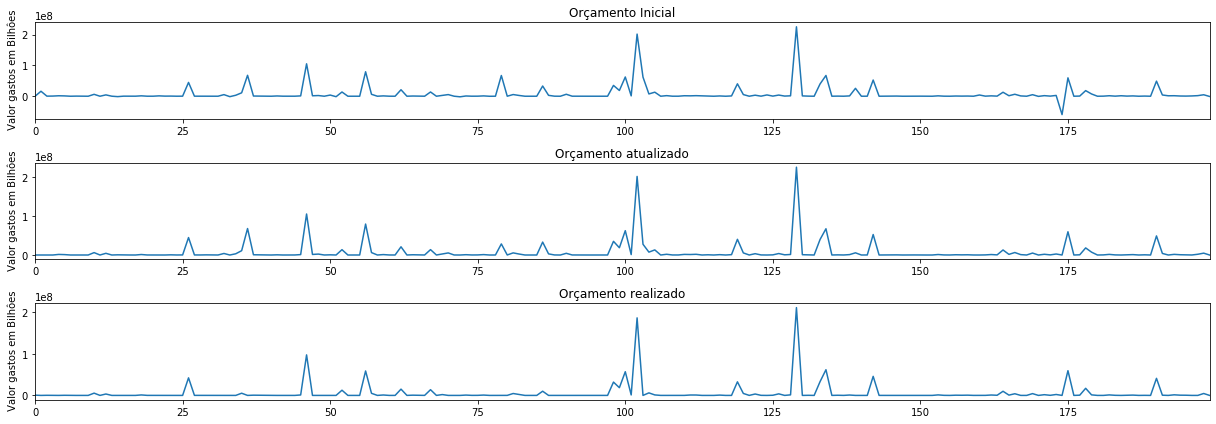

In [ ]:
# Criando a area para plotar os gráficos
fig,(ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(17,6))

#Gráfico 1
df['ORÇAMENTO INICIAL (R$)'].head(200).plot(kind='line',ax=ax1)
ax1.set_title("Orçamento Inicial")
ax1.set_ylabel(" Valor gastos em Bilhôes")

#Gráfico 2
df['ORÇAMENTO ATUALIZADO (R$)'].head(200).plot(kind='line',ax=ax2)
ax2.set_title("Orçamento atualizado")
ax2.set_ylabel(" Valor gastos em Bilhôes")

#Gráfico 3
df['ORÇAMENTO REALIZADO (R$)'].head(200).plot(kind='line',ax=ax3)
ax3.set_title("Orçamento realizado")
ax3.set_ylabel(" Valor gastos em Bilhôes")

#Ajustar os gráficos de acordo com o espaço.
plt.tight_layout()

> Analisando a amostra acima podemos observar como o dinheiro usado para a honrar as despesas foram gastos ao longo das primeiras 200 requisições. Agora vamos olhar mais afundo a descrição estatística dessas variáveis.

In [ ]:
#Descrição estatística das colunas a baixo.
df[['ORÇAMENTO INICIAL (R$)','ORÇAMENTO ATUALIZADO (R$)','ORÇAMENTO REALIZADO (R$)']].describe()

,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$)
count,3.229600e+04,3.229600e+04,3.229600e+04
mean,9.999350e+07,1.020835e+08,8.155762e+07
std,6.094561e+09,4.982563e+09,3.899174e+09
min,-4.810261e+11,-1.573924e+09,-2.766392e+07
25%,1.710344e+04,1.153449e+04,0.000000e+00
50%,2.595259e+05,1.976048e+05,2.520242e+04
75%,2.179407e+06,1.625109e+06,5.911303e+05
max,6.546891e+11,6.546891e+11,4.622612e+11


> Como os valores estão grandes no dataframe, eles apareceram em potência de 10, porém fácil de se analisar. Podemos observar que existem muitos outliers nesse conjunto de dados pelos seguinte fatores:
* **Média x Mediana:** observamos que a média na primeira coluna é de 10 milhões enquanto que a mediana é de 259 mil. O que nos mostra que existem valores exorbitantes puxando o valor da média para cima.
* **Desvio Padrão:** Observa-se também que o desvio padrão(std) em todas as colunas é maior do que média, o que indica uma grande variação de valores.
* **Valor máximo:** Podemos ver que em todas as colunas o maior valor é 100.000 vezes maior do que 75% dos valores da coluna. Isso explica a média maior que a mediana e a grande variação dos dados.

>Podemos ver que existem alguns valores que podem distorcer nossa análise, porém como não será executada a criação de um modelo de machine learning não será necessária a correção desses dados. A análise exploratória é capaz de fornecer os insights.

#3.1 Hipóteses e Insights
> Agora que verificamos a confiança dos dados podemos nesta etapa lançar algumas perguntas e verificar se elas geram algum insight relevante para nós, de forma que a informação agregue valor.

##3.1.1 Qual foi o valor gasto em 2019 pelo orçamento da despesa?

In [ ]:
#verificando os gastos de 2019.
Inicial = df['ORÇAMENTO INICIAL (R$)'].sum()
Final = df['ORÇAMENTO REALIZADO (R$)'].sum()
print('Valor gasto no ano de 2019: {}'.format(Inicial-Final))

Valor gasto no ano de 2019: 595405313042.9097


> Vemos que o valor gasto foi exorbitante, foi mais de R$ 595 bilhoes.
## 3.1.2 Qual orgão gastou mais dinheiro?

In [ ]:
#Criando uma nova coluna de valor gasto
df['GASTOS'] =  df['ORÇAMENTO INICIAL (R$)'] -  df['ORÇAMENTO REALIZADO (R$)']

# Ordenando os orgãos que mais gastaram
df.groupby(['NOME ÓRGÃO SUPERIOR']).GASTOS.sum().sort_values(ascending = False)

NOME ÓRGÃO SUPERIOR
Ministério da Economia                                         4.548668e+11
Ministério da Previdência Social                               6.153644e+10
Ministério da Educação                                         3.252092e+10
Ministério da Infraestrutura                                   1.328802e+10
Presidência da República                                       1.171995e+10
Ministério do Desenvolvimento Regional                         1.088279e+10
Ministério da Agricultura, Pecuária e Abastecimento            9.149570e+09
Ministério da Defesa                                           7.199780e+09
Ministério da Saúde                                            6.269366e+09
Ministério da Justiça e Segurança Pública                      6.062863e+09
Ministério da Ciência, Tecnologia, Inovações e Comunicações    6.015067e+09
Ministério da Cidadania                                        3.638355e+09
Ministério do Meio Ambiente                                    1.476

> Mais uma vez pelos números serem muito grandes eles aparecem em potências de 10, mas analisando os dados vemos que top 3 orgãos que mais gastaram em 2019 foram:
* **Ministerio da Economia:** 454 Bilhões de reais.
* **Ministerio da Previdência Social:** 61,5 Bilhões de reais.
* **Ministerio da Educação:** 32,5 Bilhões de reais.


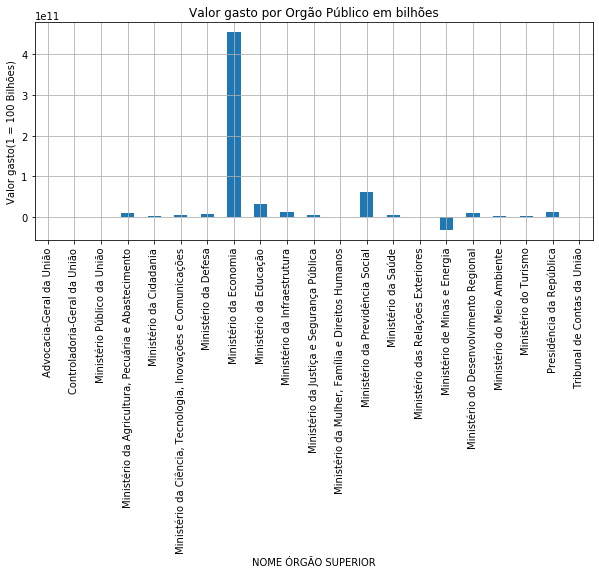

In [ ]:
# Gráfico ilustrando o que foi dito acima
df.groupby(['NOME ÓRGÃO SUPERIOR']).GASTOS.sum().plot(kind = 'bar', figsize =(10,4),grid = True );
plt.title("Valor gasto por Orgão Público em bilhões")
plt.ylabel('Valor gasto(1 = 100 Bilhões)');

## 3.1.3 Quais são as despesas mais recorrentes?

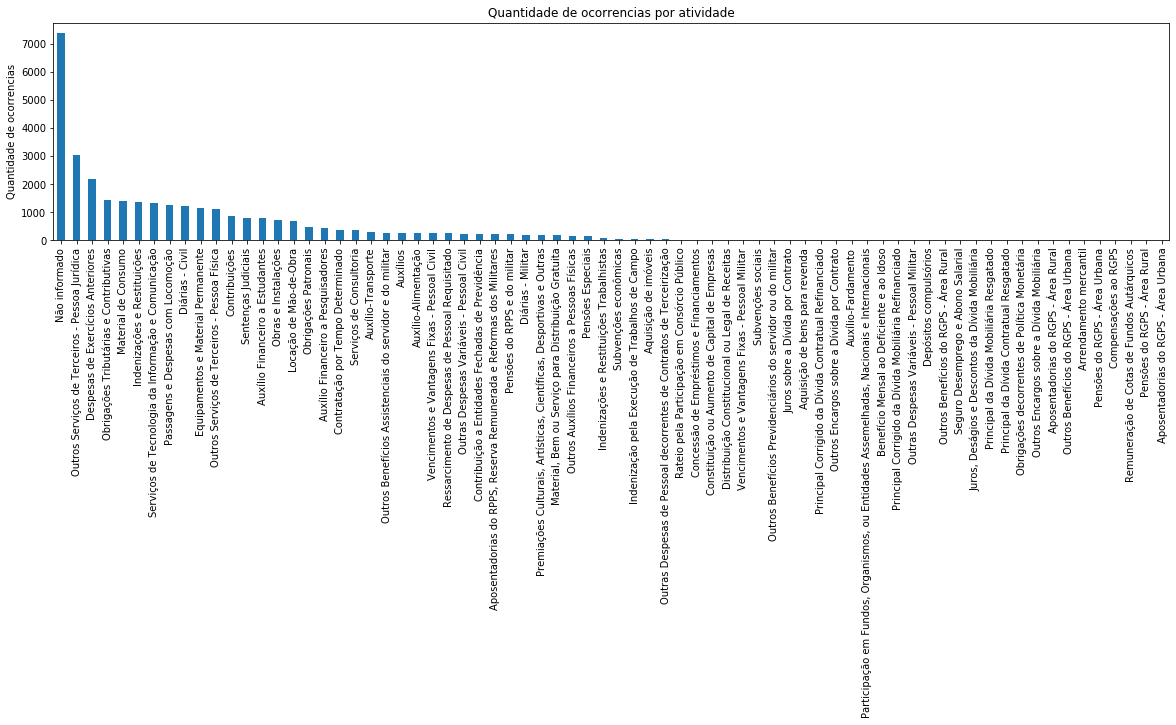

In [ ]:
# Contando o número de ocorrêcias de acordo com item.
df['NOME ELEMENTO DE DESPESA'].value_counts().plot(kind = 'bar', figsize = (20,4))
plt.ylabel("Quantidade de ocorrencias")
plt.title("Quantidade de ocorrencias por atividade");

> Com a excessão da primeira barra, cujo o gasto não foi justificado, as despesas que figuram como as 3 mais requisistadas foram:
* **Terceirização:** com cerca de 3000 requisições.
* **Despesas de anos anteriores:** Ocorreram cerca de 2000 vezes.
* **Obrigações tributárias:** Aconteceram cerca de 1500 vezes.

## 3.1.4 Quais foram as despesas mais caras?

In [ ]:
#Agrupando gastos de acordo com a despesa.
df.groupby(['NOME ELEMENTO DE DESPESA']).GASTOS.sum().sort_values(ascending = False).head(10)

NOME ELEMENTO DE DESPESA
Principal Corrigido da Dívida Mobiliária Refinanciado    2.179582e+11
Juros, Deságios e Descontos da Dívida Mobiliária         1.094245e+11
Sentenças Judiciais                                      3.860750e+10
Principal da Dívida Mobiliária Resgatado                 3.477893e+10
Auxílios                                                 2.847924e+10
Aposentadorias do RGPS - Área Urbana                     2.187440e+10
Principal Corrigido da Dívida Contratual Refinanciado    1.934922e+10
Concessão de Empréstimos e Financiamentos                1.530939e+10
Outros Serviços de Terceiros - Pessoa Jurídica           1.186187e+10
Contribuições                                            1.100020e+10
Name: GASTOS, dtype: float64

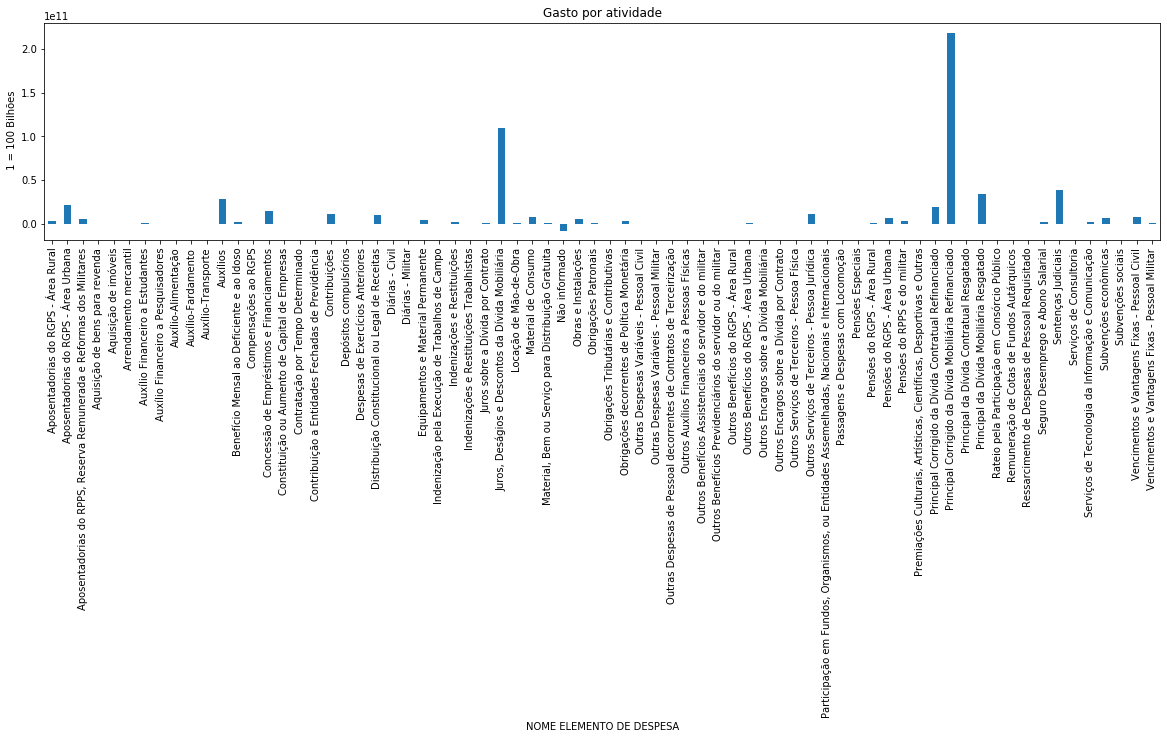

In [ ]:
df.groupby(['NOME ELEMENTO DE DESPESA']).GASTOS.sum().plot(kind = 'bar', figsize = (20,4))
plt.ylabel(" 1 = 100 Bilhões")
plt.title("Gasto por atividade");

> Podemos observar que dentre 5 despesas mais caras, 4 delas figuram alguma forma de dívida por parte do governo, entre elas a mais cara que bate a casa dos 217 bilhões de reais.

## 3.1.5 Com o que o Ministério da Economia(Maior gastador) utilizou seus recuros?

In [ ]:
#Localizando na base de dados todas as celulas que possuem 'ministerio da economia'
# e contando o número de vezes que cada despesa ocorreu.
df['NOME ELEMENTO DE DESPESA'].loc[df['NOME ÓRGÃO SUPERIOR']=='Ministério da Economia'].value_counts()

Não informado                                                                                992
Despesas de Exercícios Anteriores                                                            216
Outros Serviços de Terceiros - Pessoa Jurídica                                               162
Indenizações e Restituições                                                                  116
Serviços de Tecnologia da Informação e Comunicação                                           109
Diárias - Civil                                                                               88
Contribuições                                                                                 87
Passagens e Despesas com Locomoção                                                            86
Sentenças Judiciais                                                                           77
Obrigações Tributárias e Contributivas                                                        69
Outros Serviços de Terceiros -

## 3.1.6 Com o que o Ministério da Previdência Social(Segundo maior gastador) utilizou seus recursos?

In [ ]:
#Numero de realizações de cada uma das atividades exercidas pelo ministério.
df['NOME ELEMENTO DE DESPESA'].loc[df['NOME ÓRGÃO SUPERIOR']=='Ministério da Previdência Social'].value_counts()

Não informado                              14
Sentenças Judiciais                         4
Despesas de Exercícios Anteriores           3
Pensões do RGPS - Área Rural                1
Outros Benefícios do RGPS - Área Urbana     1
Pensões do RGPS - Área Urbana               1
Aposentadorias do RGPS - Área Rural         1
Aposentadorias do RGPS - Área Urbana        1
Indenizações e Restituições                 1
Outros Benefícios do RGPS - Área Rural      1
Name: NOME ELEMENTO DE DESPESA, dtype: int64

## 3.1.7 Com o que o Ministério da Educação(Terceiro maior gastador) utilizou seus recursos?

In [ ]:
#Numero de realizações de cada uma das atividades exercidas pelo ministério.
df['NOME ELEMENTO DE DESPESA'].loc[df['NOME ÓRGÃO SUPERIOR']=='Ministério da Educação'].value_counts()

Não informado                                                                                2467
Outros Serviços de Terceiros - Pessoa Jurídica                                               1411
Despesas de Exercícios Anteriores                                                            1288
Obrigações Tributárias e Contributivas                                                        759
Material de Consumo                                                                           696
Indenizações e Restituições                                                                   693
Serviços de Tecnologia da Informação e Comunicação                                            654
Auxílio Financeiro a Estudantes                                                               650
Outros Serviços de Terceiros - Pessoa Física                                                  605
Passagens e Despesas com Locomoção                                                            603
Diárias - Civil     

> Podemos ver mais uma vez (com exceção da primeira linha) que o maior causador de gastos são dívidas, dessa vez de anos anteriores. Isso ocorreu 216 vezes no ano de 2019. O mesmo ocorre com o Ministério da Educação, as despesas de exercícios anteriores figura entre as atividades mais ocorrentes. Já no Ministério da Previdência Social não existem muitas atividades exercidas, porém os gastos foram altos. Vamos utilizar agora um recurso mais poderoso para poder encontrar outras correlações entre as variáveis e por último verificar os insights encontrados.

## 3.2 Correlação entre variáveis

Aqui vamos utilizar da biblioteca seaborn e uma matriz de correlação para nos ajudar graficamente a identificar o comportamento de uma feature em relação a outra.

In [ ]:
# Criando a matriz de correlação 
corr = df.corr()

#Mostrando na tela
display(corr)

,EXERCÍCIO,CÓDIGO ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO SUBORDINADO,CÓDIGO UNIDADE ORÇAMENTÁRIA,CÓDIGO FUNÇÃO,CÓDIGO SUBFUNÇÃO,CÓDIGO PROGRAMA ORÇAMENTÁRIO,CÓDIGO CATEGORIA ECONÔMICA,CÓDIGO GRUPO DE DESPESA,CÓDIGO ELEMENTO DE DESPESA,ORÇAMENTO INICIAL (R$),ORÇAMENTO ATUALIZADO (R$),ORÇAMENTO REALIZADO (R$),GASTOS
EXERCÍCIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CÓDIGO ÓRGÃO SUPERIOR,NaN,1.000000,0.774114,0.821004,-0.041093,-0.063881,0.060444,0.134942,0.123161,-0.066086,-0.004395,-0.005109,-0.004575,-0.002405
CÓDIGO ÓRGÃO SUBORDINADO,NaN,0.774114,1.000000,0.661715,-0.065610,-0.082365,0.058691,0.115648,0.113555,-0.048863,-0.000898,-0.000904,-0.000201,-0.001262
CÓDIGO UNIDADE ORÇAMENTÁRIA,NaN,0.821004,0.661715,1.000000,0.049640,0.044385,-0.055890,0.127538,0.118385,-0.088037,0.039259,0.033759,0.031840,0.030951
CÓDIGO FUNÇÃO,NaN,-0.041093,-0.065610,0.049640,1.000000,0.588495,-0.243862,0.310223,0.194303,-0.050836,0.016544,0.019812,0.015642,0.010711
CÓDIGO SUBFUNÇÃO,NaN,-0.063881,-0.082365,0.044385,0.588495,1.000000,-0.297144,0.140816,0.061576,-0.077031,0.019426,0.024266,0.021776,0.009003
CÓDIGO PROGRAMA ORÇAMENTÁRIO,NaN,0.060444,0.058691,-0.055890,-0.243862,-0.297144,1.000000,0.030017,0.300825,0.025407,-0.021829,-0.027472,-0.026301,-0.008196
CÓDIGO CATEGORIA ECONÔMICA,NaN,0.134942,0.115648,0.127538,0.310223,0.140816,0.030017,1.000000,0.670757,-0.086042,0.007554,0.008902,0.004741,0.007408
CÓDIGO GRUPO DE DESPESA,NaN,0.123161,0.113555,0.118385,0.194303,0.061576,0.300825,0.670757,1.000000,-0.019308,0.015486,0.018571,0.015194,0.009447
CÓDIGO ELEMENTO DE DESPESA,NaN,-0.066086,-0.048863,-0.088037,-0.050836,-0.077031,0.025407,-0.086042,-0.019308,1.000000,0.010510,0.012369,0.012655,0.003956


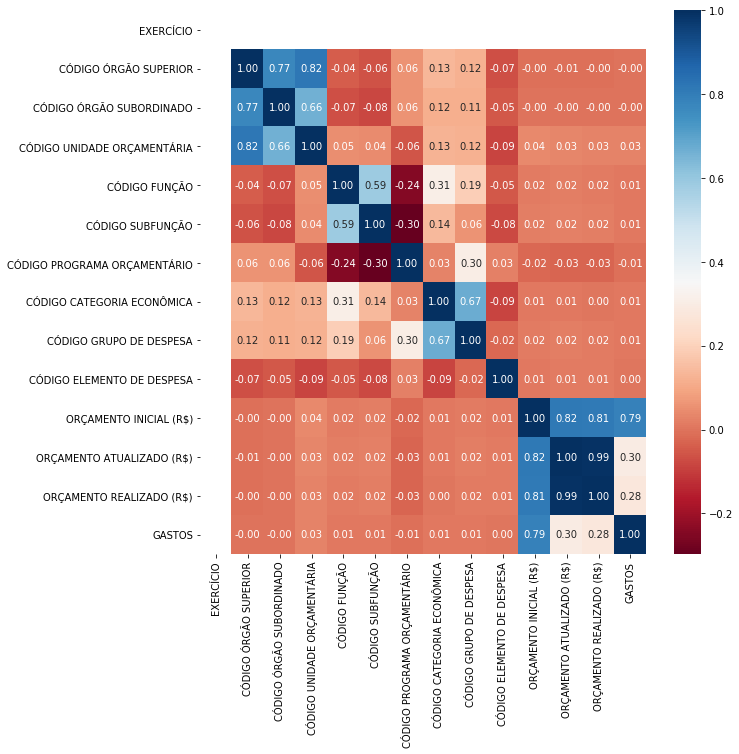

In [ ]:
# Criando uma mapa de calor para mostrar o quão forte é a correlação entre as variáveis.
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr,cmap='RdBu', fmt='.2f', linecolor='white', annot=True,ax=ax);

> Analisando o heatmap podemos observar várias correlações entre múltiplas variáveis, tanto positivas como negativas, porém são correlações que não nos trazem informações importantes como por exemplo, existe uma relação muito forte entre os diferentes orçamentos, o que é óbvio, já que uma variável depende da outra. Outro ponto que não nos favorece é que esse conjunto de dados é muito categórico, ou seja, possui muitos dados em strings que não nos permite traçar qualquer padrão ou relação entre as features.

# 3.2 Insights

> Tendo todas essas informações em mãos o que podemos extrair delas?
* **Desequilibrio Orçamentário:** Isso pode ser observado, uma vez que o ministério da economia representa cerca de 76,3% (454,4 bilhões) dos gastos do governo no ano de 2019, algo que prejudica o avanço do país, já que essa renda poderia ser redistribuida entre outros ministérios para outros investimentos, não só o pagamento de débitos.
* **Caro X Recorrente:** Analisando os dados dos gráficos de despesas mais caras e os cruzando com o gráfico de despesas mais recorrentes, podemos observar que o governo brasileiro investe muito recurso em dívidas ou débitos passados, porém essas atividades não representam 5% de todas as atividades, ou seja, mais uma vez comprovando a má distribuição de recursos entre as atividades exercidas em 2019. Podemos exemplificar isso com a atividade "Outros serviços e terceiros" que ocorreu um pouco mais de 3000 vezes, porém custou cerca de 468 milhões de reais, enquanto que "O principal corrigido da divída mobiliária refinanciado" custou mais de 217 Bilhões, ocorrendo apenas em 3 oportunidades. Podemos ver que o segundo ocorreu 1000 vezes menos, porém custou 463,7% a mais.
* **Dívidas:** Muitos dos gastos de todos os orgãos remetem à pagamentos de débitos, mostrando a péssima gestão dos recursos uma vez que se criam muitas contas. Entre as dívidas temos aquelas que são a respeito de exercícios anteriores que nos Ministérios da Economia e Educação (primeiro e terceiro maiores gastadores, respectivamente) figuram entre as 3 atividades mais recorrentes, mostrando que muitos orgãos carregam dívidas excessivas de outros anos.

# 4. Conclusão e Recomendações

> Conclui-se que existe uma disparidade muito grande entre os orgãos públicos, uma vez que apenas um deles representa 76% dos gastos anuais e isso implica em uma má distribuição dos recursos, causando déficit em outras áreas que talves necessitem do dinheiro. Outro ponto importante é a quantidade de dívidas que o governo carrega, o que implica mais uma vez em gastos que não são necessários e atrapalham no desenvolvimento da nação, uma vez que se essas dívidas não existissem o recurso poderia ser direcionado a outras áreas de forma a melhorar a infraestrutura do país, por exemplo. 

>Também é importante ressaltar a quantidade de valores gastos pelo governo sem a expecificação da atividade exercida, o que pode implicar em um desvio na análise, uma vez que não se sabe para qual função destina-se o recurso. Tendo esses pontos em vista, recomenda-se que haja uma melhor distribuição de renda para que todos os ministérios e orgãos públicos possam investir em todos os setores da sociedade de forma igual, para que a nação brasileira tenha retorno e desenvolvimento, além de fazer o possível para evitar dívidas futuras que causem problemas no orçamento atrapalhando a distribuição de renda e comprometimento dos recursos. Para finalizar, também se recomenda a especificação de todas as atividades realizadas, para que futuramente possa ser feita uma análise mais completa do cenário e, com base nessa análise, deve-se seguir os seguintes pontos:

* **Melhor distribuição de renda.**
* **Evitar dívidas futuras.**
* **Especificar todas as atividades exercidas.**
* **Evitar gastos desnecessários.**
* **Buscar desenvolver todos os setores da sociedade de forma igual**

> Seguindo esses dizeres, futuramente poderá se notar melhoras no orçamento de despesa e dimuição de dívidas, além de ter o devido retorno dos impostos para a sociedade em forma de infraestruta.